<a href="https://colab.research.google.com/github/Deepika1454/Audio-Classification-with-Pre-trained-Model/blob/main/Yolov8_based_social_distancing_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 18.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 82.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 70.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 39.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 79.2 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling 

Saving istockphoto-1225483657-612x612.jpg to istockphoto-1225483657-612x612 (1).jpg


100%|██████████| 6.25M/6.25M [00:00<00:00, 115MB/s]



0: 480x640 1 car, 400.5ms
Speed: 18.3ms preprocess, 400.5ms inference, 39.7ms postprocess per image at shape (1, 3, 480, 640)


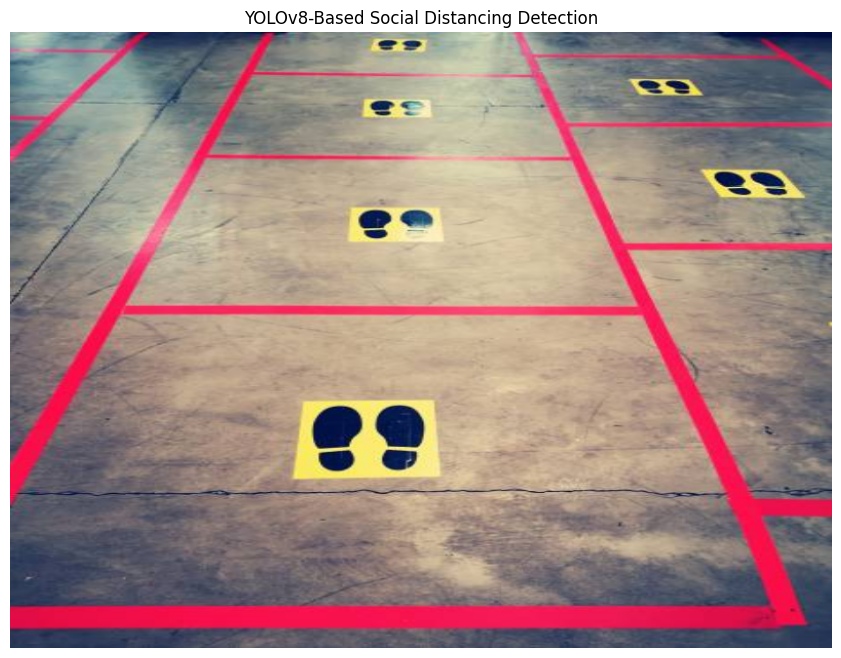

In [6]:
# Step 1: Install Ultralytics YOLOv8
!pip install ultralytics matplotlib

from ultralytics import YOLO
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
import math



Saving hqdefault.jpg to hqdefault.jpg

0: 480x640 9 persons, 1 skateboard, 220.0ms
Speed: 10.0ms preprocess, 220.0ms inference, 2.3ms postprocess per image at shape (1, 3, 480, 640)


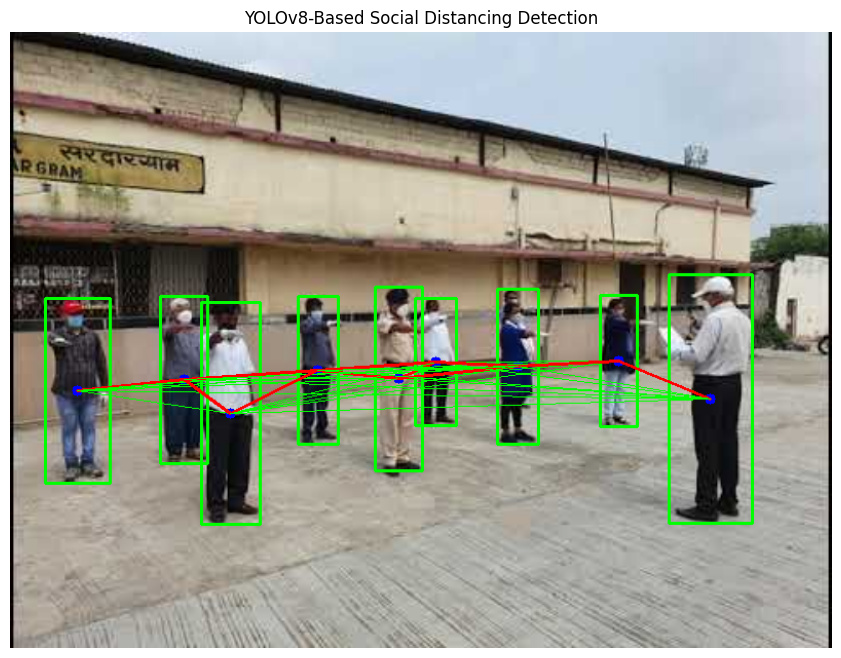

In [8]:
# Step 2: Upload your image
uploaded = files.upload()
filename = list(uploaded.keys())[0]

# Step 3: Load image
image = cv2.imread(filename)
image = cv2.resize(image, (800, 600))

# Step 4: Load YOLOv8 pretrained model
model = YOLO('yolov8n.pt')  # You can use 'yolov8s.pt' for better accuracy if Colab allows

# Step 5: Detect people
results = model.predict(image)[0]
people = [box for box in results.boxes if int(box.cls[0]) == 0]  # class 0 = person

# Step 6: Draw detections and compute distancing
centers = []
for box in people:
    x1, y1, x2, y2 = map(int, box.xyxy[0])
    cx, cy = (x1 + x2) // 2, (y1 + y2) // 2
    centers.append((cx, cy))
    cv2.rectangle(image, (x1, y1), (x2, y2), (0,255,0), 2)
    cv2.circle(image, (cx, cy), 5, (255,0,0), -1)

# Step 7: Draw lines between people
MIN_DIST = 150  # Adjust based on your image

for i in range(len(centers)):
    for j in range(i+1, len(centers)):
        c1, c2 = centers[i], centers[j]
        dist = math.hypot(c1[0] - c2[0], c1[1] - c2[1])
        color = (0, 255, 0) if dist >= MIN_DIST else (0, 0, 255)
        thickness = 2 if dist < MIN_DIST else 1
        cv2.line(image, c1, c2, color, thickness)

# Step 8: Show final result
plt.figure(figsize=(12, 8))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("YOLOv8-Based Social Distancing Detection")
plt.axis('off')
plt.show()
